In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")

df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# AdaBoostRegressor

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_validate
from bayes_opt import BayesianOptimization
from hyperopt import hp,fmin,tpe,Trials,partial
from hyperopt.early_stop import no_progress_loss
import hyperopt

In [13]:
def bayesopt_objective(n_estimators,learning_rate):
    model= AdaBoostRegressor(n_estimators=int(n_estimators)
              ,learning_rate=learning_rate
              )
    cv=KFold(n_splits=10,shuffle=True,random_state=99)
    validate_loss=cross_validate(model,X_train,y_train
                                   ,cv=cv
                                   ,scoring='neg_root_mean_squared_error'
                                   ,n_jobs=-1
                                   ,error_score='raise')
    
    return np.mean(abs(validate_loss['test_score']))

In [14]:
def param_bayes_opt(init_points,n_iter):
    opt=BayesianOptimization(bayesopt_objective
                             ,param_grid_simple
                             ,random_state=99)
    
    opt.maximize(init_points=init_points 
                 ,n_iter=n_iter 
                )
    
    params_best=opt.max['params'] 
    score_best=opt.max['target'] 
    
    print("\n","best params: ", params_best,
          "\n","best cvscore: ", score_best)
    
    return params_best,score_best

In [15]:
def bayes_opt_validation(params_best):
    model=AdaBoostRegressor(n_estimators=int(params_best['n_estimators'])
            ,learning_rate=params_best['learning_rate']
           )
    cv=KFold(n_splits=10,shuffle=True,random_state=99)
    validate_loss=cross_validate(model,X_train,y_train
                                   ,cv=cv
                                   ,scoring='neg_root_mean_squared_error'
                                   ,n_jobs=-1
                                  )
    
    return np.mean(abs(validate_loss['test_score']))

In [16]:
# Start time
start_time = time.time()

param_grid_simple={'n_estimators':(800,5000)
                   ,'learning_rate':( 0.001,0.999)
                  }

params_best,score_best=param_bayes_opt(20,100)

params_best 
score_best 
validation_score=bayes_opt_validation(params_best) 
validation_score # day
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.06383   | 0.6719    | 2.85e+03  |
| 2         | 0.06322   | 0.8248    | 932.1     |
| 3         | 0.0635    | 0.8074    | 3.176e+03 |
| 4         | 0.06232   | 0.298     | 996.1     |
| 5         | 0.06266   | 0.9896    | 828.7     |
| 6         | 0.06361   | 0.7693    | 3.936e+03 |
| 7         | 0.06413   | 0.3777    | 2.875e+03 |
| 8         | 0.06345   | 0.9281    | 2.461e+03 |
| 9         | 0.06344   | 0.973     | 3.003e+03 |
| 10        | 0.06341   | 0.09443   | 4.216e+03 |
| 11        | 0.06394   | 0.2123    | 3.128e+03 |
| 12        | 0.06406   | 0.2927    | 4.228e+03 |
| 13        | 0.06329   | 0.8274    | 1.731e+03 |
| 14        | 0.06303   | 0.6445    | 1.2e+03   |
| 15        | 0.0632    | 0.4118    | 1.207e+03 |
| 16        | 0.06221   | 0.1447    | 1.691e+03 |
| 17        | 0.06333   | 0.4767    | 1.126e+03 |
| 18        | 0.06129   | 0.2356    | 827.5     |


In [18]:
params_best['n_estimators'] = int(params_best['n_estimators'])
ada_reg = AdaBoostRegressor(**params_best)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3056832610181354, n_estimators=3937)

In [19]:
y_pred= ada_reg.predict(X_test)
y_pred1=ada_reg.predict(X_val)
y_pred2=ada_reg.predict(X_train)

In [20]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.05404001982021308
mean_squared_error: 0.004151140934017596
rmse: 0.064429348390447
r2 score: 0.9167420775106022


In [21]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.05477761333364791
mean_squared_error: 0.0041791775382707145
rmse: 0.06464655859572661
r2 score: 0.9145629702432646


In [22]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.05260169691237912
mean_squared_error: 0.003900157709575931
rmse: 0.062451242658380555
r2 score: 0.9238706385051391


In [24]:
from yellowbrick.regressor import PredictionError

D:\Conda_data\envs\pykan\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


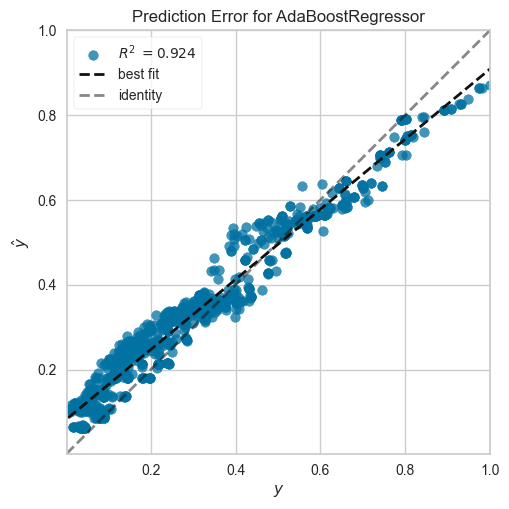

<AxesSubplot: title={'center': 'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
visualizer = PredictionError(ada_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()